In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
os.chdir('C:\\Users\dell\\projects datasets')
dt = pd.read_csv('Coffe_sales.csv')
display(dt)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dell\AppData\Local\Temp\ipykernel_6724\1365620512.py:1: SyntaxWarning: invalid escape sequence '\d'
  os.chdir('C:\\Users\dell\\projects datasets')


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [5]:
dt.describe

<bound method NDFrame.describe of       hour_of_day cash_type  money    coffee_name Time_of_Day Weekday  \
0              10      card  38.70          Latte     Morning     Fri   
1              12      card  38.70  Hot Chocolate   Afternoon     Fri   
2              12      card  38.70  Hot Chocolate   Afternoon     Fri   
3              13      card  28.90      Americano   Afternoon     Fri   
4              13      card  38.70          Latte   Afternoon     Fri   
...           ...       ...    ...            ...         ...     ...   
3542           10      card  35.76     Cappuccino     Morning     Sun   
3543           14      card  35.76          Cocoa   Afternoon     Sun   
3544           14      card  35.76          Cocoa   Afternoon     Sun   
3545           15      card  25.96      Americano   Afternoon     Sun   
3546           18      card  35.76          Latte       Night     Sun   

     Month_name  Weekdaysort  Monthsort        Date             Time  
0           Mar   

In [7]:
dt.info

<bound method DataFrame.info of       hour_of_day cash_type  money    coffee_name Time_of_Day Weekday  \
0              10      card  38.70          Latte     Morning     Fri   
1              12      card  38.70  Hot Chocolate   Afternoon     Fri   
2              12      card  38.70  Hot Chocolate   Afternoon     Fri   
3              13      card  28.90      Americano   Afternoon     Fri   
4              13      card  38.70          Latte   Afternoon     Fri   
...           ...       ...    ...            ...         ...     ...   
3542           10      card  35.76     Cappuccino     Morning     Sun   
3543           14      card  35.76          Cocoa   Afternoon     Sun   
3544           14      card  35.76          Cocoa   Afternoon     Sun   
3545           15      card  25.96      Americano   Afternoon     Sun   
3546           18      card  35.76          Latte       Night     Sun   

     Month_name  Weekdaysort  Monthsort        Date             Time  
0           Mar     

In [9]:
dt.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [11]:
dt.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [13]:
dt.dtypes

hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Date            object
Time            object
dtype: object

In [15]:
dt['money'] = dt['money'].round().astype(int)


In [17]:
dt.dtypes

hour_of_day     int64
cash_type      object
money           int32
coffee_name    object
Time_of_Day    object
Weekday        object
Month_name     object
Weekdaysort     int64
Monthsort       int64
Date           object
Time           object
dtype: object

In [19]:
y= dt['coffee_name'].values
display (y)

array(['Latte', 'Hot Chocolate', 'Hot Chocolate', ..., 'Cocoa',
       'Americano', 'Latte'], dtype=object)

In [21]:
from sklearn .preprocessing import LabelEncoder
lb = LabelEncoder ()
y= lb.fit_transform(y)
y

array([7, 6, 6, ..., 3, 0, 7])

In [23]:
pd.DataFrame(y).values

array([[7],
       [6],
       [6],
       ...,
       [3],
       [0],
       [7]])

In [51]:
new = dt[['money','hour_of_day']]
new

,money,hour_of_day
0,39,10
1,39,12
2,39,12
3,29,13
4,39,13
...,...,...
3542,36,10
3543,36,14
3544,36,14
3545,26,15


In [55]:
for col in ['cash_type', 'Time_of_Day', 'Month_name']:
    dt[col + '_enc'] = LabelEncoder().fit_transform(dt[col])

catdf= dt[['cash_type_enc', 'Time_of_Day_enc', 'Month_name_enc']]
catdf


,cash_type_enc,Time_of_Day_enc,Month_name_enc
0,0,1,7
1,0,0,7
2,0,0,7
3,0,0,7
4,0,0,7
...,...,...,...
3542,0,1,7
3543,0,0,7
3544,0,0,7
3545,0,0,7


In [61]:
X =pd. concat([new, catdf], axis = 1).values
X

array([[39, 10,  0,  1,  7],
       [39, 12,  0,  0,  7],
       [39, 12,  0,  0,  7],
       ...,
       [36, 14,  0,  0,  7],
       [26, 15,  0,  0,  7],
       [36, 18,  0,  2,  7]], dtype=int64)

In [69]:
y

array([7, 6, 6, ..., 3, 0, 7])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X ,y ,test_size=0.2 ,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(2837, 5)
(710, 5)
(2837,)
(710,)
(3547, 5)
(3547,)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (n_estimators=100 , criterion= 'gini')
rfc.fit(x_train , y_train)


RandomForestClassifier()

In [92]:
y

array([7, 6, 6, ..., 3, 0, 7])

In [94]:
y.reshape(1,-1)

array([[7, 6, 6, ..., 3, 0, 7]])

In [98]:
y_pred = rfc.predict(x_test)
y_pred

array([2, 1, 1, 6, 7, 4, 2, 1, 3, 7, 0, 0, 2, 2, 6, 7, 3, 1, 2, 7, 6, 6,
       1, 1, 0, 0, 7, 4, 0, 6, 6, 7, 0, 0, 1, 7, 0, 1, 4, 4, 2, 2, 1, 3,
       1, 2, 2, 0, 7, 2, 7, 0, 4, 6, 1, 7, 5, 0, 5, 1, 7, 7, 1, 7, 6, 6,
       0, 1, 3, 4, 0, 1, 7, 7, 7, 6, 4, 1, 6, 7, 7, 1, 0, 6, 2, 4, 7, 4,
       1, 1, 7, 3, 1, 2, 0, 1, 2, 1, 6, 6, 3, 0, 1, 3, 5, 0, 0, 1, 6, 6,
       5, 1, 0, 2, 7, 7, 0, 2, 3, 6, 7, 2, 2, 7, 7, 5, 7, 6, 7, 0, 7, 2,
       2, 1, 1, 7, 1, 7, 0, 7, 2, 4, 7, 4, 4, 3, 3, 2, 0, 4, 1, 4, 1, 1,
       1, 6, 0, 4, 7, 1, 2, 1, 0, 6, 2, 1, 2, 1, 1, 1, 0, 4, 2, 1, 1, 1,
       7, 7, 7, 7, 7, 2, 1, 7, 1, 0, 0, 1, 7, 1, 0, 3, 2, 0, 0, 3, 1, 4,
       1, 2, 7, 2, 2, 7, 0, 6, 7, 1, 1, 0, 6, 1, 0, 7, 0, 4, 0, 0, 1, 4,
       7, 7, 7, 1, 1, 5, 7, 4, 1, 2, 4, 2, 7, 7, 1, 4, 0, 4, 0, 7, 1, 1,
       1, 2, 3, 1, 2, 2, 0, 4, 1, 7, 1, 6, 1, 1, 7, 0, 0, 7, 2, 2, 2, 4,
       4, 2, 3, 1, 2, 6, 2, 4, 1, 7, 1, 2, 2, 0, 2, 4, 0, 7, 7, 0, 1, 7,
       6, 7, 2, 2, 2, 1, 1, 6, 6, 4, 7, 1, 0, 4, 0,

In [120]:
df1 = pd.DataFrame(y_pred, columns=['PREDICTION'])
print(df1.head())


   PREDICTION
0           2
1           1
2           1
3           6
4           7


In [158]:
y_df = pd.DataFrame(y, columns=['ACTUAL'])
print(y_df.head())


   ACTUAL
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


In [160]:
result = pd.concat([y_df,df1], axis=1)
display(result)

,ACTUAL,PREDICTION
0,NaN,2.0
1,NaN,1.0
2,NaN,1.0
3,NaN,6.0
4,NaN,7.0
...,...,...
3542,NaN,NaN
3543,NaN,NaN
3544,NaN,NaN
3545,NaN,NaN


In [162]:
from sklearn. metrics import accuracy_score
ac = accuracy_score(y_pred , y_test )
ac

0.5971830985915493

In [237]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[ 83   2   0   0  30   0   0   0]
 [  1 159   0   0   0   0   0   1]
 [  0   0  34  12   0   0  18  43]
 [  0   0   4   8   0   0   7  11]
 [ 31   0   0   0  26   0   0   0]
 [  0   0   0   0   1  23   0   0]
 [  0   0  25   6   0   0  13  18]
 [  0   1  37  15   0   0  23  78]]


In [169]:
from sklearn. metrics import classification_report
cr = classification_report (y_pred, y_test)
cr

'              precision    recall  f1-score   support\n\n           0       0.72      0.72      0.72       115\n           1       0.98      0.99      0.98       161\n           2       0.34      0.32      0.33       107\n           3       0.20      0.27      0.23        30\n           4       0.46      0.46      0.46        57\n           5       1.00      0.96      0.98        24\n           6       0.21      0.21      0.21        62\n           7       0.52      0.51      0.51       154\n\n    accuracy                           0.60       710\n   macro avg       0.55      0.55      0.55       710\nweighted avg       0.60      0.60      0.60       710\n'

In [173]:
unique_coffees = dt['coffee_name'].unique()
print(unique_coffees)


['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


<function matplotlib.pyplot.show(close=None, block=None)>

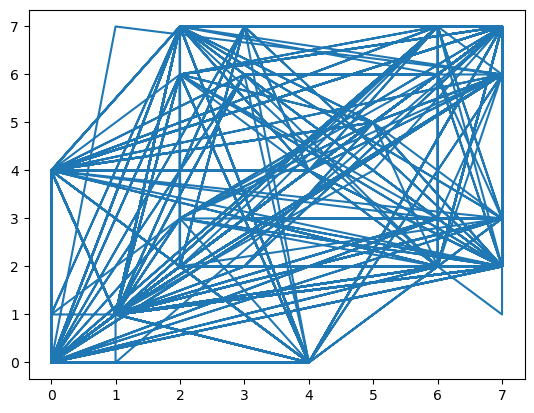

In [175]:
plt . plot (y_pred, y_test)
plt.show

In [178]:
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

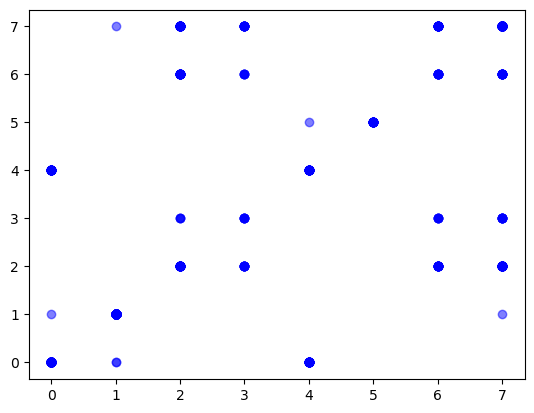

In [180]:
plt.scatter(y_test_array, y_pred_array, color='blue', alpha=0.5, label='Predictions')
plt.show

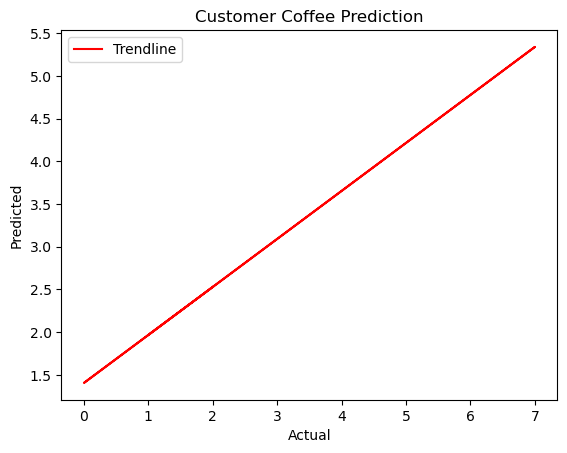

In [235]:
m, b = np.polyfit(y_test_array, y_pred_array, 1)  # slope, intercept
plt.plot(y_test_array, m*y_test_array + b, color='red', label='Trendline')

# Labels
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Customer Coffee Prediction')
plt.legend()
plt.show()

In [184]:

dt

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,cash_type_enc,Time_of_Day_enc,Month_name_enc
0,10,card,39,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,0,1,7
1,12,card,39,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,0,0,7
2,12,card,39,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,0,0,7
3,13,card,29,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,0,0,7
4,13,card,39,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,36,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000,0,1,7
3543,14,card,36,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000,0,0,7
3544,14,card,36,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000,0,0,7
3545,15,card,26,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000,0,0,7


In [225]:
da = dt['hour_of_day']
da

0       10
1       12
2       12
3       13
4       13
        ..
3542    10
3543    14
3544    14
3545    15
3546    18
Name: hour_of_day, Length: 3547, dtype: int64

In [227]:
cn =  dt['money']
cn

0       39
1       39
2       39
3       29
4       39
        ..
3542    36
3543    36
3544    36
3545    26
3546    36
Name: money, Length: 3547, dtype: int32

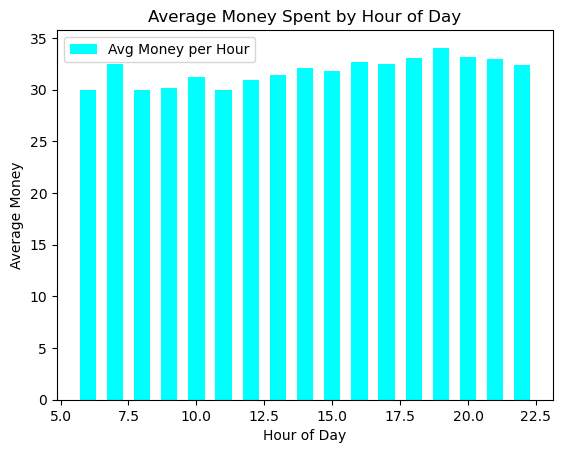

In [233]:
avg_money_per_hour = dt.groupby("hour_of_day")["money"].mean()
plt.bar(avg_money_per_hour.index, avg_money_per_hour.values, color="aqua", width=0.6, label="Avg Money per Hour")
plt.title("Average Money Spent by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Money")
plt.legend()
plt.show()